In [1]:
# 本地环境名称 xy_ultra(Python 3.8.17)

本项目主要用于记录有序回归Ordinal regression，即有序回归的实现。其中重点实现了[Class Distance Weighted Cross-Entropy Loss for Ulcerative Colitis Severity Estimation](https://arxiv.org/abs/2202.05167)中研究提出的类距离加权交叉熵损失函数.

#### 获取原始数据

In [2]:
# 这个数据的字段含义对应于https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [3]:
import pandas as pd
import numpy as np

data_df = pd.read_csv("https://raw.githubusercontent.com/gagolews/ordinal_regression_data/master/cement_strength.csv")
data_df.tail()

,response,V1,V2,V3,V4,V5,V6,V7,V8
993,3,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
994,2,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
995,2,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
996,2,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28
997,2,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28


In [4]:
data_df.columns

Index(['response', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'], dtype='object')

In [5]:
data_df['response'] = data_df['response']-1 # 设置标签从0开始.
data_labels = data_df['response']
data_features = data_df.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']]

print("特征个数:", data_features.shape[1])
print("样本个数:", data_features.shape[0])
print("标签取值:", np.unique(data_labels.values))

特征个数: 8
样本个数: 998
标签取值: [0 1 2 3 4]


#### 一个标签聚类可视化

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for n in range(1, 6):
    kmeans = KMeans(n_clusters=n, init='k-means++', 
                    n_init=10, max_iter=300, tol=0.0001, 
                    random_state=1)
    kmeans.fit(data_features)
    inertia.append(kmeans.inertia_)

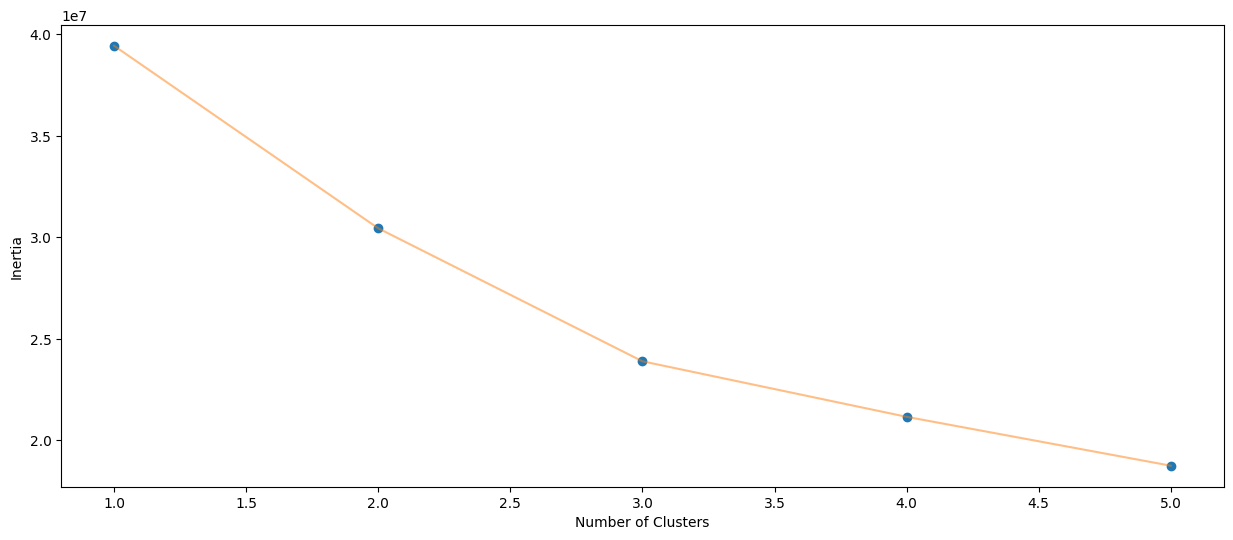

In [7]:
# 对不同k取值的SSE进行可视化,假设不知道有几类.
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 6), inertia, 'o')
plt.plot(np.arange(1, 6), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### 将数据集划分为训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features.values, 
                                                    data_labels.values, 
                                                    test_size=0.2, 
                                                    random_state=1, 
                                                    stratify=data_labels.values)

#### 特征标准化

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)